In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 



In [2]:
pip install mplsoccer


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('events.csv',sep = ';')
df.head()

,id,eventId,typeId,periodId,timeMin,timeSec,team_name,outcome,x,y,...,shortName,shorter name,pro,x1_bin_xT,y1_bin_xT,x2_bin_xT,y2_bin_xT,start_zone_value_xT,end_zone_value_xT,xT
0,2847225799,3,Pass,1,0,0,27xvwccz8kpmqsefjv2b2sc0o,Successful,60.12,39.92,...,P. Aubameyang,PA,-3.026862,6.0,3.0,5.0,4.0,0.016895,0.014846,-0.002049
1,2847225857,4,Pass,1,0,2,27xvwccz8kpmqsefjv2b2sc0o,Successful,53.64,38.00,...,M. O'Riley,MO,-14.890577,5.0,3.0,3.0,2.0,0.014846,0.011105,-0.003741
2,2847225935,5,Pass,1,0,6,27xvwccz8kpmqsefjv2b2sc0o,Successful,42.24,23.92,...,B. Pavard,BP,-2.952130,4.0,2.0,3.0,5.0,0.012692,0.011105,-0.001587
3,2847225955,6,Pass,1,0,10,27xvwccz8kpmqsefjv2b2sc0o,Successful,35.76,50.40,...,F. Medina,FM,-11.840750,3.0,5.0,2.0,3.0,0.011105,0.010165,-0.000939
4,2847225969,7,Pass,1,0,12,27xvwccz8kpmqsefjv2b2sc0o,Successful,23.40,36.80,...,L. Balerdi,LB,4.364951,2.0,3.0,3.0,1.0,0.010165,0.010595,0.000429


In [4]:
df['team_name'].unique()

array(['27xvwccz8kpmqsefjv2b2sc0o', '3kq9cckrnlogidldtdie2fkbl'],
      dtype=object)

In [5]:
# quick look at a dataset

print('Columns :', df.columns.tolist())


Columns : ['id', 'eventId', 'typeId', 'periodId', 'timeMin', 'timeSec', 'team_name', 'outcome', 'x', 'y', 'end_x', 'end_y', 'cross', 'ThrowIn', 'playerName', 'assist', 'keyPass', 'lb', 'shortName', 'shorter name', 'pro', 'x1_bin_xT', 'y1_bin_xT', 'x2_bin_xT', 'y2_bin_xT', 'start_zone_value_xT', 'end_zone_value_xT', 'xT']


In [6]:
# label teams change names 


df['team_label'] = df['team_name'].replace({
    '27xvwccz8kpmqsefjv2b2sc0o': 'Marseille_FC',
    '3kq9cckrnlogidldtdie2fkbl': 'RealMadrid_FC'
})
df.head()

,id,eventId,typeId,periodId,timeMin,timeSec,team_name,outcome,x,y,...,shorter name,pro,x1_bin_xT,y1_bin_xT,x2_bin_xT,y2_bin_xT,start_zone_value_xT,end_zone_value_xT,xT,team_label
0,2847225799,3,Pass,1,0,0,27xvwccz8kpmqsefjv2b2sc0o,Successful,60.12,39.92,...,PA,-3.026862,6.0,3.0,5.0,4.0,0.016895,0.014846,-0.002049,Marseille_FC
1,2847225857,4,Pass,1,0,2,27xvwccz8kpmqsefjv2b2sc0o,Successful,53.64,38.00,...,MO,-14.890577,5.0,3.0,3.0,2.0,0.014846,0.011105,-0.003741,Marseille_FC
2,2847225935,5,Pass,1,0,6,27xvwccz8kpmqsefjv2b2sc0o,Successful,42.24,23.92,...,BP,-2.952130,4.0,2.0,3.0,5.0,0.012692,0.011105,-0.001587,Marseille_FC
3,2847225955,6,Pass,1,0,10,27xvwccz8kpmqsefjv2b2sc0o,Successful,35.76,50.40,...,FM,-11.840750,3.0,5.0,2.0,3.0,0.011105,0.010165,-0.000939,Marseille_FC
4,2847225969,7,Pass,1,0,12,27xvwccz8kpmqsefjv2b2sc0o,Successful,23.40,36.80,...,LB,4.364951,2.0,3.0,3.0,1.0,0.010165,0.010595,0.000429,Marseille_FC


In [7]:
df[df['team_label'] == 'RealMadrid_FC']['playerName']

7              A. Güler
8              A. Güler
11        A. Tchouaméni
13         Éder Militão
14         Éder Militão
             ...       
1696    Álvaro Carreras
1697    Álvaro Carreras
1701    Vinícius Júnior
1705    Álvaro Carreras
1706    Álvaro Carreras
Name: playerName, Length: 782, dtype: object

In [8]:
df['typeId'].unique()

array(['Pass', 'Dispossessed', 'Tackle', 'Out', 'Interception',
       'Ball touch', 'Ball recovery', 'Error', 'Miss', 'Take On', 'Foul',
       'Clearance', 'Deleted event', 'Offside Pass', 'Offside provoked',
       'Start delay', 'End delay', 'Player off', 'Player on',
       'Formation change', '74', 'Post', 'Attempt Saved', 'Save',
       'Keeper pick-up', '83', 'Challenge', 'Corner Awarded', 'Aerial',
       'Keeper Sweeper', '68', '81', '80', 'Goal', 'Penalty faced',
       'Good Skill', 'Claim', 'Card', '70',
       'Contentious referee decision'], dtype=object)

In [9]:
df['outcome'].unique()

array(['Successful', 'Unsuccessful'], dtype=object)

In [10]:
PASS_ID = 1
SHOT_ID = 10

print("Teams:", df['team_label'].unique())

Teams: ['Marseille_FC' 'RealMadrid_FC']


In [11]:
# Team summary KPIs (passes, accuracy, shots, goals, xT)

def team_summary_small(events):
    is_pass = events['typeId'] == PASS_ID
    is_shot = events['typeId'] == SHOT_ID

    
    outcome_lower = events['outcome'].astype(str).str.lower()

    summary = events.groupby('team_label').agg(
        passes=('typeId', lambda x: (x==PASS_ID).sum()),
        successful_passes=('outcome', lambda x: x.astype(str).str.lower().isin(['successful','complete','completed']).sum()),
        shots=('typeId', lambda x: (x==SHOT_ID).sum()),
        goals=('outcome', lambda x: x.astype(str).str.lower().eq('goal').sum()),
        xT_total=('xT', 'sum')
    ).reset_index()

    summary['pass_accuracy_%'] = (summary['successful_passes'] / summary['passes'] * 100).replace([np.inf, -np.inf], 0).fillna(0).round(1)
    return summary

summary_df = team_summary_small(df)
summary_df

,team_label,passes,successful_passes,shots,goals,xT_total,pass_accuracy_%
0,Marseille_FC,0,749,0,0,0.417814,0.0
1,RealMadrid_FC,0,626,0,0,0.129398,0.0


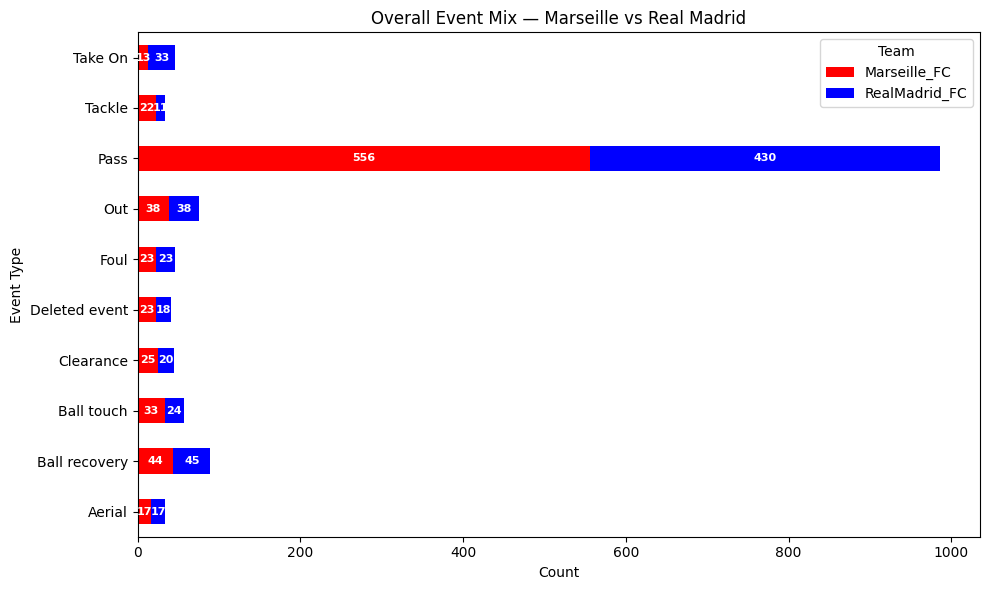

In [12]:
# Top 10 event types
N = 10
top_types = df['typeId'].value_counts().head(N).index.tolist()

overall = (
    df[df['typeId'].isin(top_types)]
    .groupby(['typeId','team_label'])['id']
    .count()
    .reset_index(name='count')
)

pivot_overall = overall.pivot(index='typeId', columns='team_label', values='count').fillna(0).astype(int)

ax = pivot_overall.plot(
    kind='barh',
    stacked=True,
    figsize=(10,6),
    color=['red','blue']
)
ax.set_title("Overall Event Mix — Marseille vs Real Madrid")
ax.set_xlabel("Count")
ax.set_ylabel("Event Type")
ax.legend(title="Team")

# Add labels on bars
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(
            p.get_x() + width/2,   # center of bar segment
            p.get_y() + p.get_height()/2,
            str(int(width)),
            ha='center', va='center', color='white', fontsize=8, fontweight='bold'
        )

plt.tight_layout()
plt.show()


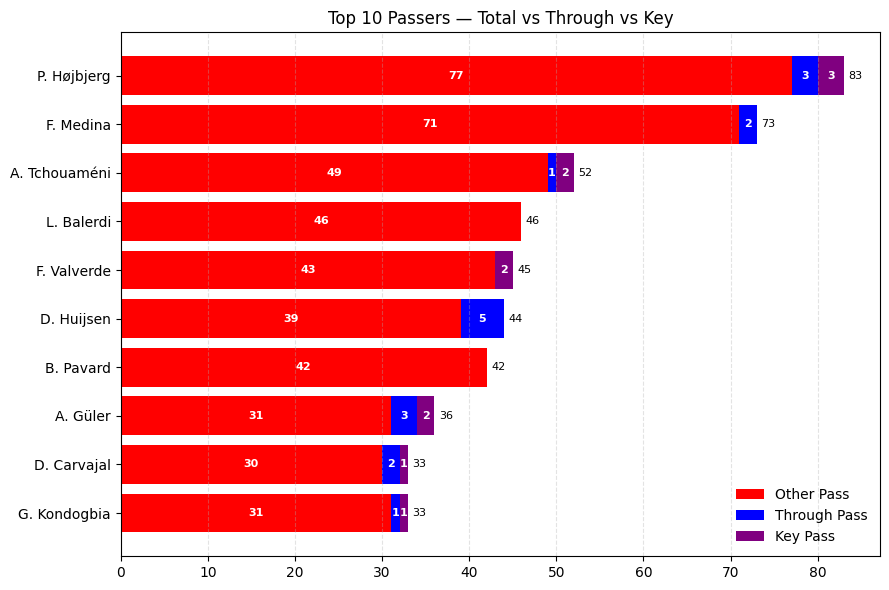

In [13]:
# --- TOP 10 PASSERS: total passes split into Through Passes + Key Passes (stacked) ---
# uses: df with columns ['typeId','outcome','x','y','end_x','end_y','keyPass','cross', 'shortName'/'playerName']
# if you need to load: df = pd.read_csv("events.csv", sep=';')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) successful passes only
passes = df[(df['typeId'].astype(str).str.lower()=='pass') &
            (df['outcome'].astype(str).str.lower()=='successful')].copy()

# 2) numeric coords
for c in ['x','y','end_x','end_y']:
    passes[c] = pd.to_numeric(passes[c], errors='coerce')

# 3) THROUGH PASS (simple geometry heuristic)
dx  = passes['end_x'] - passes['x']
dy  = passes['end_y'] - passes['y']
dst = np.hypot(dx, dy)
central = passes['y'].between(18, 62)                    # central corridor (0–80 scale)
narrow  = dy.abs() <= 12                                 # narrow lane
forward = (dx >= 15) & (dst >= 18)                       # good forward progress
not_cross = (pd.to_numeric(passes.get('cross', 0), errors='coerce').fillna(0) != 1)
passes['is_through'] = forward & central & narrow & not_cross

# 4) KEY PASS (use column directly if present)
passes['is_key'] = (pd.to_numeric(passes.get('keyPass', 0), errors='coerce')
                    .fillna(0).astype(int) == 1)

# 5) aggregate per player
name_col = 'shortName' if 'shortName' in passes.columns else 'playerName'
agg = passes.groupby(name_col).agg(
    total_passes = ('typeId','count'),
    through_pass = ('is_through','sum'),
    key_pass     = ('is_key','sum')
).reset_index()

# 6) compute "other passes" to complete the stack
agg['other_pass'] = (agg['total_passes'] - agg['through_pass'] - agg['key_pass']).clip(lower=0)

# 7) top 10 by total passes
top10 = agg.sort_values('total_passes', ascending=False).head(10).iloc[::-1]

# 8) plot: stacked horizontal (red = other, blue = through, purple = key)
fig, ax = plt.subplots(figsize=(9,6))
ax.barh(top10[name_col], top10['other_pass'],  color='red',    label='Other Pass')
ax.barh(top10[name_col], top10['through_pass'], left=top10['other_pass'], color='blue',   label='Through Pass')
ax.barh(top10[name_col], top10['key_pass'],     left=top10['other_pass']+top10['through_pass'],
        color='purple', label='Key Pass')

# value labels on segments
for i, r in top10.reset_index(drop=True).iterrows():
    x0 = 0
    for val in [r['other_pass'], r['through_pass'], r['key_pass']]:
        if val > 0:
            ax.text(x0 + val/2, i, str(int(val)), ha='center', va='center',
                    color='white', fontsize=8, fontweight='bold')
            x0 += val
    # total at bar end
    ax.text(r['total_passes'] + 0.5, i, f"{int(r['total_passes'])}", va='center', fontsize=8)

ax.set_title("Top 10 Passers — Total vs Through vs Key")
ax.set_xlabel("") ; ax.set_ylabel("")
ax.xaxis.grid(True, linestyle='--', alpha=0.35)
ax.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.show()


In [18]:
from matplotlib.patches import Arc, Circle, Rectangle

[OK] Saved: passmap_27xvwccz8kpmqsefjv2b2sc0o.png


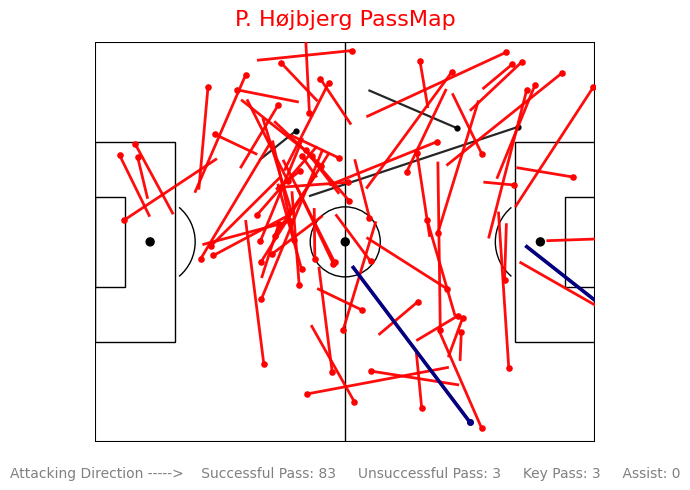

[OK] Saved: passmap_3kq9cckrnlogidldtdie2fkbl.png


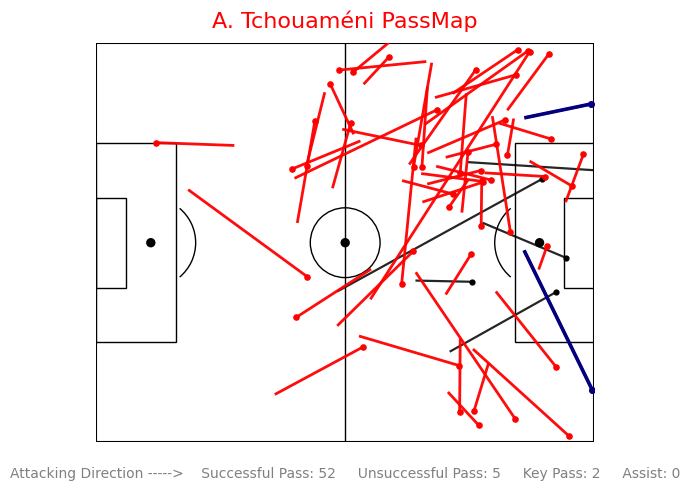

In [22]:
# === Pass maps for the TOP passer of each team (robust + saves PNGs) ===
# successful=red, unsuccessful=black, key=dark blue, assist=green

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Circle, Rectangle

# ---------- 1) Load safely ----------
def load_events(path="events.csv"):
    try:
        df = pd.read_csv(path, sep=";")
    except Exception:
        df = pd.read_csv(path)
    # if you already renamed team_name to Marseille_FC / RealMadrid_FC, just copy to team_label
    df['team_label'] = df.get('team_label', df['team_name'])
    df['typeId']  = df['typeId'].astype(str)
    df['outcome'] = df['outcome'].astype(str)
    return df

df = load_events("events.csv")

# choose display name
NAME_COL = 'shortName' if 'shortName' in df.columns else 'playerName'

# ---------- 2) Small pitch (100x80) ----------
def draw_pitch(ax, x_max=100, y_max=80):
    ax.add_patch(Rectangle((0,0), x_max, y_max, fill=False, lw=1.5, color='black'))
    ax.plot([x_max/2, x_max/2], [0, y_max], color='black', lw=1)
    ax.add_patch(Circle((x_max/2, y_max/2), 7.0, fill=False, color='black', lw=1))
    ax.add_patch(Circle((x_max/2, y_max/2), 0.8, color='black'))
    ax.add_patch(Rectangle((0, 20), 16, 40, fill=False, lw=1))
    ax.add_patch(Rectangle((84, 20), 16, 40, fill=False, lw=1))
    ax.add_patch(Rectangle((0, 31), 6, 18, fill=False, lw=1))
    ax.add_patch(Rectangle((94, 31), 6, 18, fill=False, lw=1))
    ax.add_patch(Circle((11, 40), 0.8, color='black'))
    ax.add_patch(Circle((89, 40), 0.8, color='black'))
    ax.add_patch(Arc((11, 40), 18, 18, angle=0, theta1=310, theta2=50, color='black'))
    ax.add_patch(Arc((89, 40), 18, 18, angle=0, theta1=130, theta2=230, color='black'))
    ax.set_xlim(0, x_max); ax.set_ylim(0, y_max)
    ax.set_aspect('equal'); ax.axis('off')

# ---------- 3) Key pass (derive if missing) ----------
def derive_is_key(d: pd.DataFrame) -> pd.Series:
    if 'keyPass' in d.columns:
        return pd.to_numeric(d['keyPass'], errors='coerce').fillna(0).eq(1)
    tmp = d.copy()
    for c in ['timeMin','timeSec']:
        tmp[c] = pd.to_numeric(tmp[c], errors='coerce').fillna(0)
    tmp['t'] = tmp['timeMin']*60 + tmp['timeSec']
    tmp = tmp.sort_values(['team_label','periodId','t','id'])
    g = tmp.groupby(['team_label','periodId'], dropna=False)
    next_type = g['typeId'].shift(-1).astype(str)
    next_t    = g['t'].shift(-1)
    shot_types = {'Goal','Miss','Attempt Saved','Post','Save'}
    is_key = (
        tmp['typeId'].str.lower().eq('pass') &
        tmp['outcome'].str.lower().eq('successful') &
        next_type.isin(shot_types) &
        ((next_t - tmp['t']) <= 10)
    )
    return is_key.reindex(d.index).fillna(False)

# ---------- 4) One figure for a team's top passer ----------
def passmap_top_passer(events: pd.DataFrame, team: str, save_png=True):
    d = events.copy()
    # successful passes for this team
    team_succ = d[(d['team_label']==team) &
                  (d['typeId'].str.lower()=='pass') &
                  (d['outcome'].str.lower()=='successful')]
    if team_succ.empty:
        print(f"[WARN] No successful passes for team: {team}")
        return

    # top passer name (most successful passes)
    top_name = (team_succ.groupby(NAME_COL)['id']
                .count().sort_values(ascending=False).index[0])

    # all passes by this player
    p = d[(d['team_label']==team) &
          (d['typeId'].str.lower()=='pass') &
          (d[NAME_COL]==top_name)].copy()

    # numeric coords
    for c in ['x','y','end_x','end_y','assist']:
        if c in p.columns:
            p[c] = pd.to_numeric(p[c], errors='coerce')

    is_success = p['outcome'].str.lower().eq('successful')
    is_key     = derive_is_key(p)
    is_assist  = p.get('assist', pd.Series(0, index=p.index)).fillna(0).astype(int).eq(1)

    succ = p[is_success]
    uns  = p[~is_success]
    keyp = p[is_success & is_key]
    asst = p[is_success & is_assist]

    # --- draw ---
    fig, ax = plt.subplots(figsize=(7,5))
    draw_pitch(ax, 100, 80)

    # unsuccessful = black
    for _, r in uns.iterrows():
        ax.plot([r['x'], r['end_x']], [r['y'], r['end_y']], color='black', alpha=0.85, lw=1.6, zorder=1)
        ax.scatter(r['end_x'], r['end_y'], s=12, color='black', zorder=1)

    # successful = red
    for _, r in succ.iterrows():
        ax.plot([r['x'], r['end_x']], [r['y'], r['end_y']], color='red', alpha=0.95, lw=2.0, zorder=2)
        ax.scatter(r['end_x'], r['end_y'], s=14, color='red', zorder=2)

    # key = dark blue
    for _, r in keyp.iterrows():
        ax.plot([r['x'], r['end_x']], [r['y'], r['end_y']], color='navy', alpha=1.0, lw=2.6, zorder=3)
        ax.scatter(r['end_x'], r['end_y'], s=16, color='navy', zorder=3)

    # assist = green
    for _, r in asst.iterrows():
        ax.plot([r['x'], r['end_x']], [r['y'], r['end_y']], color='green', alpha=1.0, lw=3.0, zorder=4)
        ax.scatter(r['end_x'], r['end_y'], s=18, color='green', zorder=4)

    plt.title(f"{top_name} PassMap", fontsize=16, color='red', pad=12)
    footer = (f"Attacking Direction ----->    "
              f"Successful Pass: {len(succ)}     Unsuccessful Pass: {len(uns)}     "
              f"Key Pass: {len(keyp)}     Assist: {len(asst)}")
    plt.text(0.5, -0.06, footer, transform=ax.transAxes,
             ha='center', va='top', fontsize=10, color='gray')

    plt.tight_layout()
    if save_png:
        out = f"passmap_{team}.png"
        plt.savefig(out, dpi=200, bbox_inches="tight")
        print(f"[OK] Saved: {out}")
    plt.show(block=True)

# ---------- 5) Make both figures ----------
teams = df['team_label'].dropna().unique().tolist()[:2]  # first two distinct teams
for t in teams:
    passmap_top_passer(df, t, save_png=True)


In [ ]:
df['team_label'] = df.get('team_label', df['team_name'])
df['typeId']  = df['typeId'].astype(str)
df['outcome'] = df['outcome'].astype(str)

NAME_COL = 'shortName' if 'shortName' in df.columns else 'playerName'

# timestamps (seconds)
for c in ['timeMin','timeSec']:
    df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0)
df['event_s'] = df['timeMin']*60 + df['timeSec']

# what counts as a SHOT row in your data
SHOT_TYPES = {'Goal','Miss','Attempt Saved','Post','Save'}



In [ ]:
def build_shot_involvement(events: pd.DataFrame,
                           key_window_s: int = 10,
                           build_window_s: int = 20) -> pd.DataFrame:
    d = events.copy().sort_values(['team_label','periodId','event_s','id'])

    # Helper views
    is_pass   = d['typeId'].str.lower().eq('pass')
    succ_pass = is_pass & d['outcome'].str.lower().eq('successful')
    is_shot   = d['typeId'].isin(SHOT_TYPES)

    # Prepare numeric coords (for build-up filter using x/y)
    for c in ['x','y','end_x','end_y']:
        d[c] = pd.to_numeric(d[c], errors='coerce')

    recs = []  # (team, player, shots, assists, build)

    
    for idx, shot in d[is_shot].iterrows():
        team   = shot['team_label']
        period = shot['periodId']
        tshot  = shot['event_s']

       
        prior = d[(d['team_label']==team) & (d['periodId']==period) &
                  (d['event_s'] < tshot) & (d['event_s'] >= tshot-build_window_s)]

       
        shooter = shot[NAME_COL]
        recs.append((team, shooter, 1, 0, 0))

      
        prior_succ_pass = prior[succ_pass.loc[prior.index]]
        kp = prior_succ_pass[prior_succ_pass['event_s'] >= tshot-key_window_s]
        if not kp.empty:
            assister = kp.iloc[-1][NAME_COL]  # closest prior
            recs.append((team, assister, 0, 1, 0))
            key_idx = kp.iloc[-1].name
        else:
            key_idx = None

        
        build = prior_succ_pass.copy()
        if key_idx is not None:
            build = build.drop(index=key_idx, errors='ignore')

        
        dx  = build['end_x'] - build['x']
        dy  = build['end_y'] - build['y']
        dst = np.hypot(dx, dy)
        build_mask = ((dx > 0) & (dst >= 12)) 
        build = build[build_mask]

        for _, r in build.iterrows():
            recs.append((team, r[NAME_COL], 0, 0, 1))

    inv = pd.DataFrame(recs, columns=['team_label','player','shots','assists','build'])
    if inv.empty:
        return pd.DataFrame(columns=['team_label','player','shots','assists','build','total'])

    inv = (inv.groupby(['team_label','player'], as_index=False)[['shots','assists','build']]
              .sum())
    inv['total'] = inv[['shots','assists','build']].sum(axis=1)
    return inv

involvement = build_shot_involvement(df)
involvement.head()

,team_label,player,shots,assists,build,total
0,27xvwccz8kpmqsefjv2b2sc0o,A. Gouiri,0,1,1,2
1,27xvwccz8kpmqsefjv2b2sc0o,A. Murillo,0,1,0,1
2,27xvwccz8kpmqsefjv2b2sc0o,B. Pavard,0,0,1,1
3,27xvwccz8kpmqsefjv2b2sc0o,Emerson,1,1,0,2
4,27xvwccz8kpmqsefjv2b2sc0o,F. Medina,1,2,1,4


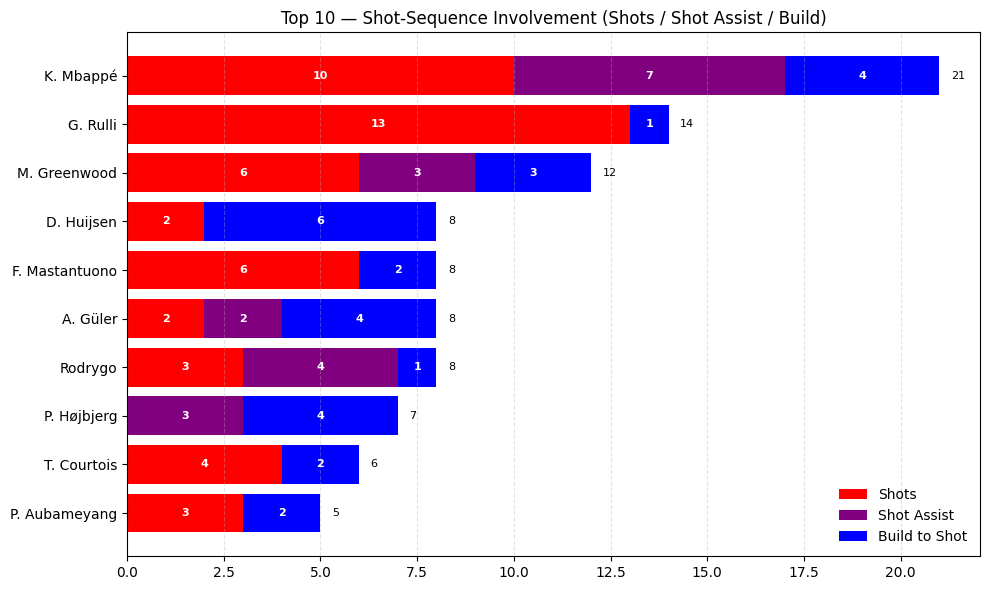

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df['team_label'] = df.get('team_label', df['team_name'])
df['typeId']  = df['typeId'].astype(str)
df['outcome'] = df['outcome'].astype(str)

NAME_COL = 'shortName' if 'shortName' in df.columns else 'playerName'
for c in ['timeMin','timeSec']:
    df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0)
df['event_s'] = df['timeMin']*60 + df['timeSec']

SHOT_TYPES = {'Goal','Miss','Attempt Saved','Post','Save'}

def build_shot_involvement(events: pd.DataFrame,
                           key_window_s: int = 10,
                           build_window_s: int = 20) -> pd.DataFrame:
    d = events.copy().sort_values(['team_label','periodId','event_s','id'])
    is_pass   = d['typeId'].str.lower().eq('pass')
    succ_pass = is_pass & d['outcome'].str.lower().eq('successful')
    is_shot   = d['typeId'].isin(SHOT_TYPES)
    for c in ['x','y','end_x','end_y']:
        d[c] = pd.to_numeric(d[c], errors='coerce')

    rows = []
    for _, shot in d[is_shot].iterrows():
        team, period, tshot = shot['team_label'], shot['periodId'], shot['event_s']
        prior = d[(d['team_label']==team) & (d['periodId']==period) &
                  (d['event_s'] < tshot) & (d['event_s'] >= tshot-build_window_s)]

        # shooter
        rows.append((team, shot[NAME_COL], 1, 0, 0))

        # key pass (closest prior successful pass within key_window_s)
        kp_cands = prior[succ_pass.loc[prior.index]]
        kp_cands = kp_cands[kp_cands['event_s'] >= tshot-key_window_s]
        key_idx = None
        if not kp_cands.empty:
            assister_row = kp_cands.iloc[-1]
            rows.append((team, assister_row[NAME_COL], 0, 1, 0))
            key_idx = assister_row.name

        # build-up passes (other successful forward-ish passes in build window)
        build = prior[succ_pass.loc[prior.index]].copy()
        if key_idx is not None:
            build = build.drop(index=key_idx, errors='ignore')
        dx = build['end_x'] - build['x']
        dy = build['end_y'] - build['y']
        dist = np.hypot(dx, dy)
        build_mask = (dx > 0) & (dist >= 12)     # simple forward+distance rule
        for _, r in build[build_mask].iterrows():
            rows.append((team, r[NAME_COL], 0, 0, 1))

    inv = pd.DataFrame(rows, columns=['team_label','player','shots','assists','build'])
    if inv.empty:
        return pd.DataFrame(columns=['team_label','player','shots','assists','build','total'])
    inv = inv.groupby(['team_label','player'], as_index=False)[['shots','assists','build']].sum()
    inv['total'] = inv[['shots','assists','build']].sum(axis=1)
    return inv

inv = build_shot_involvement(df)

# ---- Top 10 overall (both teams combined) ----
top10 = (inv.sort_values('total', ascending=False)
            .head(10)
            .iloc[::-1])  # reverse for barh (largest on top)

labels = (top10['player'].tolist())
shots   = top10['shots'].astype(int).to_numpy()
assists = top10['assists'].astype(int).to_numpy()
build   = top10['build'].astype(int).to_numpy()

fig, ax = plt.subplots(figsize=(10,6))
# stacks: red (shots), purple (assist), blue (build)
ax.barh(labels, shots,   color='red',    label='Shots')
ax.barh(labels, assists, left=shots,     color='purple', label='Shot Assist')
ax.barh(labels, build,   left=shots+assists, color='blue',   label='Build to Shot')

# value labels in segments + total at end
for i, (s,a,b) in enumerate(zip(shots, assists, build)):
    x0 = 0
    for val in (s,a,b):
        if val > 0:
            ax.text(x0 + val/2, i, str(int(val)),
                    ha='center', va='center', color='white', fontsize=8, fontweight='bold')
            x0 += val
    total = int(s+a+b)
    ax.text(total + 0.3, i, str(total), va='center', fontsize=8)

ax.set_title("Top 10 — Shot-Sequence Involvement (Shots / Shot Assist / Build)")
ax.set_xlabel(""); ax.set_ylabel("")
ax.xaxis.grid(True, linestyle='--', alpha=0.35)
ax.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.show()


Saved: mbappe_passes_received.png


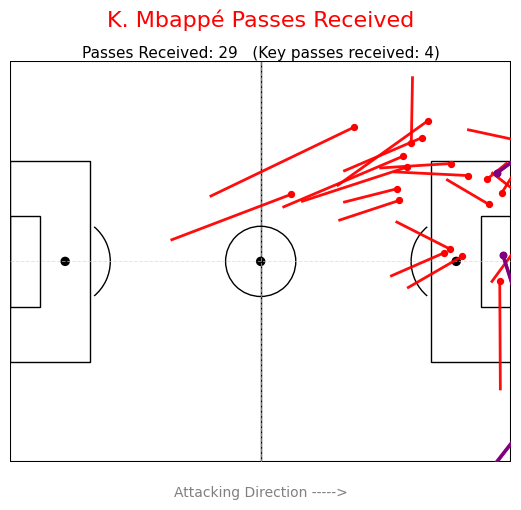

Saved: greenwood_passes_received.png


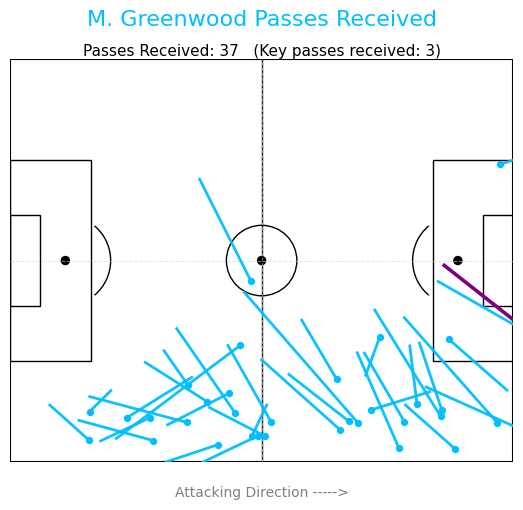

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Circle, Rectangle


df = pd.read_csv("events.csv", sep=";")     # semicolon-delimited
df['team_label'] = df.get('team_label', df['team_name'])
NAME_COL = 'shortName' if 'shortName' in df.columns else 'playerName'

df['typeId']  = df['typeId'].astype(str)
df['outcome'] = df['outcome'].astype(str)
for c in ['x','y','end_x','end_y','timeMin','timeSec']:
    df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0.0)
df['event_s'] = df['timeMin']*60 + df['timeSec']

SHOT_TYPES = {'Goal','Miss','Attempt Saved','Post','Save'}
TEAM_DIRECTION = {'RealMadrid_FC': 'right', 'Marseille_FC': 'left'}


def draw_pitch(ax, x_max=100, y_max=80):
    ax.add_patch(Rectangle((0,0), x_max, y_max, fill=False, lw=1.5, color='black'))
    ax.plot([x_max/2, x_max/2], [0, y_max], color='black', lw=1)
    ax.add_patch(Circle((x_max/2, y_max/2), 7.0, fill=False, color='black', lw=1))
    ax.add_patch(Circle((x_max/2, y_max/2), 0.8, color='black'))
    ax.add_patch(Rectangle((0, 20), 16, 40, fill=False, lw=1))
    ax.add_patch(Rectangle((84, 20), 16, 40, fill=False, lw=1))
    ax.add_patch(Rectangle((0, 31), 6, 18, fill=False, lw=1))
    ax.add_patch(Rectangle((94, 31), 6, 18, fill=False, lw=1))
    ax.add_patch(Circle((11, 40), 0.8, color='black'))
    ax.add_patch(Circle((89, 40), 0.8, color='black'))
    ax.add_patch(Arc((11, 40), 18, 18, angle=0, theta1=310, theta2=50, color='black'))
    ax.add_patch(Arc((89, 40), 18, 18, angle=0, theta1=130, theta2=230, color='black'))
    # light guides (like your reference)
    ax.axhline(40, color='lightgray', ls='--', lw=0.7, alpha=0.6)
    ax.axvline(50, color='lightgray', ls='--', lw=0.7, alpha=0.6)
    ax.set_xlim(0, x_max); ax.set_ylim(0, y_max)
    ax.set_aspect('equal'); ax.axis('off')

def draw_direction_text(ax, side, x_max=100, y_max=80, color='gray'):
    txt = "Attacking Direction ----->" if side=='right' else "<----- Attacking Direction"
    ax.text(0.5, -0.06, txt, transform=ax.transAxes, ha='center', va='top',
            fontsize=10, color=color)


def tag_recipients_and_keys(events: pd.DataFrame,
                            receive_dt=8, receive_dist=10,
                            key_window_s=10) -> pd.DataFrame:
    """Adds:
       - recipient_name: next same-team event near pass end within time window
       - is_key: pass where next same-team event is a shot within key_window_s
    """
    d = events.copy().sort_values(['team_label','periodId','event_s','id'])
    is_pass = d['typeId'].str.lower().eq('pass')
    succ    = d['outcome'].str.lower().eq('successful')
    pass_mask = is_pass & succ

    grp = d.groupby(['team_label','periodId'], dropna=False)
    d['next_type']   = grp['typeId'].shift(-1).astype(str)
    d['next_player'] = grp[NAME_COL].shift(-1)
    d['next_x']      = grp['x'].shift(-1)
    d['next_y']      = grp['y'].shift(-1)
    d['next_t']      = grp['event_s'].shift(-1)

    dist = np.hypot(d['end_x'] - d['next_x'], d['end_y'] - d['next_y'])
    d['recipient_name'] = np.where(
        pass_mask & (dist <= receive_dist) & ((d['next_t'] - d['event_s']) <= receive_dt),
        d['next_player'],
        np.nan
    )
    d['is_key'] = pass_mask & d['next_type'].isin(SHOT_TYPES) & ((d['next_t'] - d['event_s']) <= key_window_s)
    return d

df_tag = tag_recipients_and_keys(df)

def infer_player_team(events: pd.DataFrame, player_name: str):
    rec_team = events.loc[events['recipient_name']==player_name, 'team_label'].value_counts()
    if len(rec_team): return rec_team.index[0]
    all_team = events.loc[events[NAME_COL]==player_name, 'team_label'].value_counts()
    return all_team.index[0] if len(all_team) else None


def plot_passes_received(df_tagged: pd.DataFrame, player_query: str,
                         base_color='red', title_color='red', save_png=None):
    d = df_tagged.copy()

    
    names = d[NAME_COL].astype(str)
    matched = names[names.str.contains(player_query, case=False, na=False)].unique()
    if len(matched) == 0:
        print(f"No player matched '{player_query}'."); return
    player_name = matched[0]

    rec = d[d['recipient_name'] == player_name]          
    rec_key = rec[rec['is_key']]                        

    team = infer_player_team(d, player_name)
    direction = TEAM_DIRECTION.get(team, 'right')

    fig, ax = plt.subplots(figsize=(7.6,5.2))
    draw_pitch(ax, 100, 80)

    
    for _, r in rec.iterrows():
        ax.plot([r['x'], r['end_x']], [r['y'], r['end_y']],
                color=base_color, lw=2.0, alpha=0.95, zorder=2)
        ax.scatter(r['end_x'], r['end_y'], s=18, color=base_color, zorder=2)

    
    for _, r in rec_key.iterrows():
        ax.plot([r['x'], r['end_x']], [r['y'], r['end_y']],
                color='purple', lw=2.6, alpha=1.0, zorder=3)
        ax.scatter(r['end_x'], r['end_y'], s=22, color='purple', zorder=3)

    
    plt.subplots_adjust(top=0.86)
    fig.suptitle(f"{player_name} Passes Received", color=title_color, fontsize=16, y=0.97)
    ax.set_title(f"Passes Received: {len(rec)}   (Key passes received: {len(rec_key)})",
                 fontsize=11, color='black', pad=2)

    
    draw_direction_text(ax, 'right' if direction=='right' else 'left')

    plt.tight_layout()
    if save_png:
        plt.savefig(save_png, dpi=200, bbox_inches='tight')
        print(f"Saved: {save_png}")
    plt.show()


plot_passes_received(df_tag, "Mbapp", base_color='red',  title_color='red',
                     save_png="mbappe_passes_received.png")


plot_passes_received(df_tag, "Greenw", base_color='deepskyblue', title_color='deepskyblue',
                     save_png="greenwood_passes_received.png")


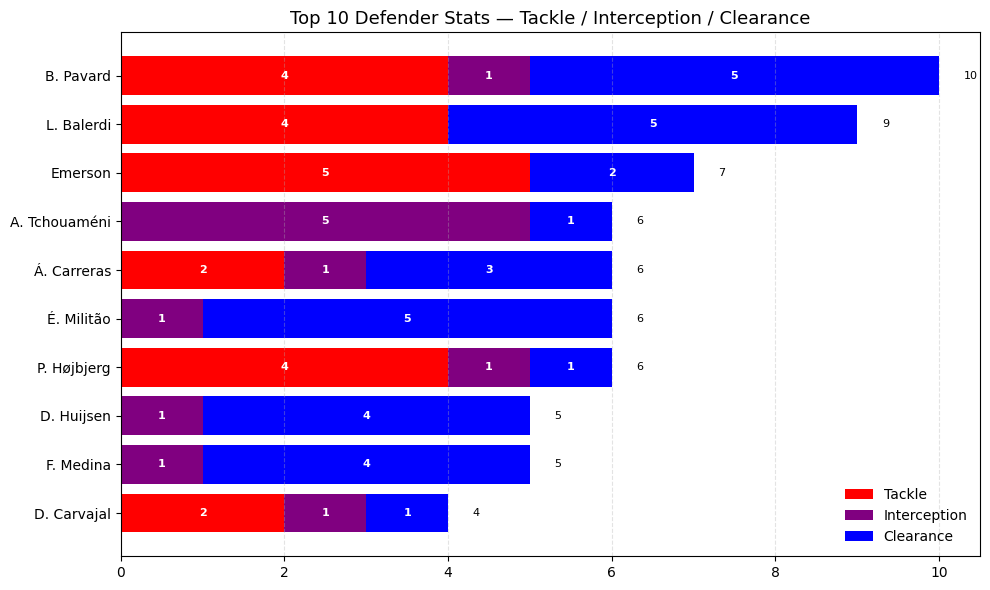

In [ ]:

try:
    df
except NameError:
    df = pd.read_csv("events.csv", sep=";")


df['typeId'] = df['typeId'].astype(str)
NAME_COL = 'shortName' if 'shortName' in df.columns else 'playerName'


keep_types = {'Tackle', 'Interception', 'Clearance'}
d = df[df['typeId'].isin(keep_types)].copy()


pivot = (d.groupby(NAME_COL)['typeId']
           .value_counts()
           .unstack(fill_value=0)
           .reindex(columns=['Tackle','Interception','Clearance'], fill_value=0))

pivot['total'] = pivot[['Tackle','Interception','Clearance']].sum(axis=1)


top10 = (pivot.sort_values('total', ascending=False)
              .head(10)
              .iloc[::-1]) 

labels = top10.index.tolist()
tackle = top10['Tackle'].to_numpy()
interc = top10['Interception'].to_numpy()
clearc = top10['Clearance'].to_numpy()


fig, ax = plt.subplots(figsize=(10,6))


ax.barh(labels, tackle,                 color='red',    label='Tackle')
ax.barh(labels, interc, left=tackle,    color='purple', label='Interception')
ax.barh(labels, clearc, left=tackle+interc, color='blue',   label='Clearance')


for i, (t,ic,cl) in enumerate(zip(tackle, interc, clearc)):
    x0 = 0
    for val in (t, ic, cl):
        if val > 0:
            ax.text(x0 + val/2, i, str(int(val)),
                    ha='center', va='center', color='white', fontsize=8, fontweight='bold')
            x0 += val
    total = int(t + ic + cl)
    ax.text(total + 0.3, i, str(total), va='center', fontsize=8)


ax.set_title("Top 10 Defender Stats — Tackle / Interception / Clearance", fontsize=13)
ax.set_xlabel(""); ax.set_ylabel("")
ax.xaxis.grid(True, linestyle='--', alpha=0.35)
ax.legend(loc='lower right', frameon=False)

plt.tight_layout()
plt.show()

Saved: pavard_def_actions.png


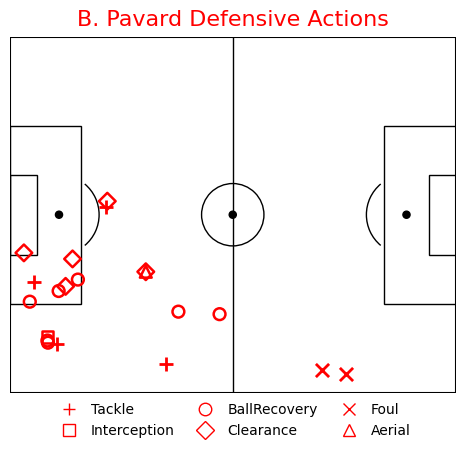

Saved: carvajal_def_actions.png


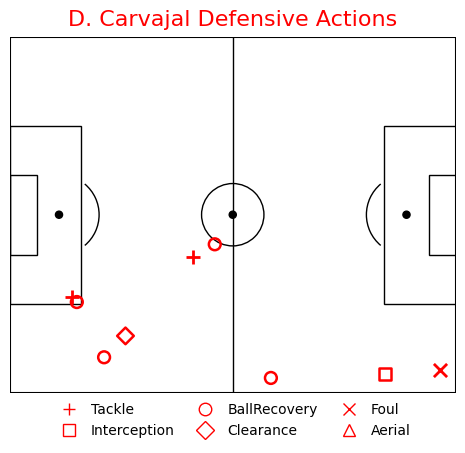

In [46]:
try:
    df
except NameError:
    df = pd.read_csv("events.csv", sep=";")  # semicolon CSV

NAME_COL = 'shortName' if 'shortName' in df.columns else 'playerName'
TEAM_COL = 'team_label' if 'team_label' in df.columns else 'team_name'

df['typeId'] = df['typeId'].astype(str)
for c in ['x','y']:
    df[c] = pd.to_numeric(df[c], errors='coerce')

TEAM_COLOR = {'RealMadrid_FC': 'red', 'Marseille_FC': 'deepskyblue'}

# ---------- PITCH ----------
def draw_pitch(ax, x_max=100, y_max=80):
    ax.add_patch(Rectangle((0,0), x_max, y_max, fill=False, lw=1.5, color='black'))
    ax.plot([x_max/2, x_max/2], [0, y_max], color='black', lw=1)
    ax.add_patch(Circle((x_max/2, y_max/2), 7.0, fill=False, color='black', lw=1))
    ax.add_patch(Circle((x_max/2, y_max/2), 0.8, color='black'))
    ax.add_patch(Rectangle((0, 20), 16, 40, fill=False, lw=1))   # PA left
    ax.add_patch(Rectangle((84, 20), 16, 40, fill=False, lw=1))  # PA right
    ax.add_patch(Rectangle((0, 31), 6, 18, fill=False, lw=1))    # 6y left
    ax.add_patch(Rectangle((94, 31), 6, 18, fill=False, lw=1))   # 6y right
    ax.add_patch(Circle((11, 40), 0.8, color='black'))
    ax.add_patch(Circle((89, 40), 0.8, color='black'))
    ax.add_patch(Arc((11, 40), 18, 18, angle=0, theta1=310, theta2=50, color='black'))
    ax.add_patch(Arc((89, 40), 18, 18, angle=0, theta1=130, theta2=230, color='black'))
    ax.set_xlim(0, x_max); ax.set_ylim(0, y_max)
    ax.set_aspect('equal'); ax.axis('off')

# ---------- DEF ACTIONS ----------
DEF_TYPES = {
    'Tackle':        {'marker': '+', 'label': 'Tackle',       'hollow': False},
    'Interception':  {'marker': 's', 'label': 'Interception', 'hollow': True},
    'Clearance':     {'marker': 'D', 'label': 'Clearance',    'hollow': True},
    'Foul':          {'marker': 'x', 'label': 'Foul',         'hollow': False},
    'Aerial':        {'marker': '^', 'label': 'Aerial',       'hollow': True},
    'Ball recovery': {'marker': 'o', 'label': 'BallRecovery', 'hollow': True},
}

def infer_player_team(d: pd.DataFrame, player_query: str):
    m = d[NAME_COL].astype(str).str.contains(player_query, case=False, na=False)
    counts = d.loc[m, TEAM_COL].value_counts()
    return counts.index[0] if len(counts) else None

def plot_def_actions_for_player(events: pd.DataFrame, player_query: str, save_png=None):
    d = events.copy()
    team = infer_player_team(d, player_query)
    color = TEAM_COLOR.get(team, 'red')

    present_types = [t for t in DEF_TYPES.keys() if t in d['typeId'].unique()]
    p = d[(d[NAME_COL].astype(str).str.contains(player_query, case=False, na=False)) &
          (d['typeId'].isin(present_types))][['x','y','typeId', NAME_COL]]

    fig, ax = plt.subplots(figsize=(7.8, 5.4))
    # extra bottom margin so legend never overlaps; also add a little top space
    plt.subplots_adjust(bottom=0.24, top=0.90)
    draw_pitch(ax, 100, 80)

    # plot each action
    for act in present_types:
        sub = p[p['typeId'] == act].dropna(subset=['x','y'])
        if sub.empty: continue
        mk = DEF_TYPES[act]['marker']
        hollow = DEF_TYPES[act]['hollow']

        if mk in ['x', '+']:  # line markers
            ax.scatter(sub['x'], sub['y'], s=90, marker=mk, color=color, linewidths=2.0, zorder=2)
        else:  # shape markers
            ax.scatter(sub['x'], sub['y'], s=72, marker=mk,
                       facecolors='none' if hollow else color,
                       edgecolors=color, linewidths=1.8, zorder=2)

    # title
    player_name = p[NAME_COL].iloc[0] if not p.empty else player_query
    ax.set_title(f"{player_name} Defensive Actions", fontsize=16, color=color, pad=8)

    # legend below the pitch (no overlap)
    legend_order = ['Tackle','Interception','Ball recovery','Clearance','Foul','Aerial']
    handles = []
    for act in legend_order:
        if act not in present_types: continue
        mk = DEF_TYPES[act]['marker']; hollow = DEF_TYPES[act]['hollow']
        if mk in ['x','+']:
            h = Line2D([0],[0], marker=mk, markersize=9, linestyle='None',
                       color=color, label=DEF_TYPES[act]['label'])
        else:
            h = Line2D([0],[0], marker=mk, markersize=9, linestyle='None',
                       markerfacecolor='none' if hollow else color,
                       markeredgecolor=color, color=color, label=DEF_TYPES[act]['label'])
        handles.append(h)

    ax.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.16),
              ncol=3, frameon=False, columnspacing=1.2, handletextpad=0.6)

    if save_png:
        plt.savefig(save_png, dpi=200, bbox_inches="tight")
        print(f"Saved: {save_png}")
    plt.show()

# ---------- RUN ----------
plot_def_actions_for_player(df, "Pavard",   save_png="pavard_def_actions.png")    # Marseille_FC (blue)
plot_def_actions_for_player(df, "Carvajal", save_png="carvajal_def_actions.png")  # RealMadrid_FC (red)